In [1]:
import numpy as np
import os
print(os.getcwd())

C:\Users\Song\python\python-data\프로젝트 ML


In [2]:
data_dir = os.chdir(os.getcwd() + "/../../travel_images")

In [3]:
from glob import glob

In [4]:
data_list = glob('*.*')
data_list[:5]

['architecure (1).jpg',
 'architecure (10).jpg',
 'architecure (100).jpg',
 'architecure (1000).jpg',
 'architecure (1001).jpg']

In [5]:
len(data_list), type(data_list)

(35034, list)

In [6]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [7]:
token = text_to_word_sequence(data_list[0])
token

['architecure', '1', 'jpg']

In [8]:
label = []

In [9]:
for i in data_list[:100] :
    token = text_to_word_sequence(i)
    label.append(token[0])
print(len(label))
print(label[:5])

100
['architecure', 'architecure', 'architecure', 'architecure', 'architecure']


In [10]:
label2 = []

In [11]:
for i in data_list :
    token = text_to_word_sequence(i)
    label2.append(token[0])
print(len(label2))
print(label2[:5])

35034
['architecure', 'architecure', 'architecure', 'architecure', 'architecure']


## 라벨인코더
### >>> 카테고리형 문자를 숫자로 자동 변환 해주는 역할

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [14]:
import cv2
import matplotlib.pyplot as plt

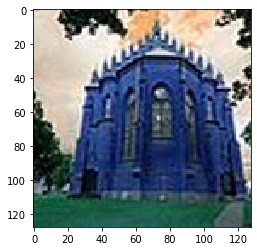

In [15]:
img = cv2.imread(data_list[0])
plt.imshow(img)

In [16]:
img.shape

(128, 128, 3)

## 표준화

In [17]:
image1 = img/255
image1[0][0]

array([0.84705882, 0.81960784, 0.74509804])

## 크기를 동일하게 변경하여 맞춰주기

In [18]:
data_height = 150
data_width = 150
channel_n = 3

In [19]:
image2 = cv2.resize(image1, (data_height, data_width))
image2.shape

(150, 150, 3)

In [20]:
img_list = []
# 255로 표준화시켜주고, 크기 변경하고 나서의 결과를 모아주기 위한 리스트
for x in data_list :
    try :
        scaled_one = cv2.imread(x) / 255
    except :
        scaled_one = 0
    resized_one = cv2.resize(scaled_one, (data_height, data_width))
#     print('변경전 : ', scaled_one.shape)
#     print('변경후 : ', resized_one.shape)   
    img_list.append(resized_one)
len(img_list), img_list[0].shape

(35034, (150, 150, 3))

### 0으로 해춰지는 4차원 배열을 하나 만들어두었다가<br>이미지 하나하나를 스케일링하고 리사이징해서<br>4차원에 하나식 넣기

In [21]:
total_images = np.zeros((5, data_height, data_width, channel_n))
total_images

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [22]:
# 읽어온 이미지 목록을 넣으면 라벨링, 스케일링, 리사이징하는 함수 선언
def make_file(data_height, data_width, channel_n, data_list_len): # 높이, 너비, 컬러, 리스트 길이
    # 라벨링한 결과를 넣을 1차원 리스트
    label=[]
    # 4차원으로 만들기 위한 4차원 리스트 필요
    images=np.zeros((data_list_len, data_height, data_width, channel_n))
    # 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징
    for i, image in enumerate(data_list):
        # 라벨링 : dog.01.jpg
        tokens=text_to_word_sequence(image, filters='()')
        label.append(tokens[0])
        
        # 읽어서 스케일링, 리사이징 
        image=cv2.imread(image) #읽기
        image=cv2.resize(image, (data_height, data_width)) /255 #리사이징, 스케일링
        # 4차원 리스트에 하나씩 append
        images[i, :, :, :]=image
    label2=np.array(label)
    return label2, images

In [23]:
labels, images = make_file(data_height, data_width, channel_n, len(data_list))

## 필요없는 이미지 제거

In [23]:
# 사진 35093개의 크기를 모두 변경
resize_list=[]
error_list=[]
i=0
for x in data_list:
    try:
        one=cv2.imread(x)/255
        resize=cv2.resize(one, (data_height, data_width))
        resize_list.append(resize)
        i=i+1
    except:
        error_list.append((i,x))
        i=i+1
        pass

In [40]:
# Nontype 이미지 제거
os.remove(error_list[0][1])

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'art_and_culture (1268).jpg'

In [25]:
# Nontype 이미지 전부 제거
for i in range(1, len(error_list)):
    os.remove(error_list[i][1])

In [24]:
labels.shape

(35034,)

In [25]:
items = labels
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 3, 3, 3], dtype=int64), 35034)

In [26]:
encoder.classes_

array(['architecure', 'art_and_culture', 'food_and_drink', 'travel'],
      dtype='<U15')

In [30]:
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.3,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

MemoryError: Unable to allocate 5.29 GiB for an array with shape (10511, 150, 150, 3) and data type float64